In [17]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [18]:
Auto = load_data('Auto')

In [19]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [21]:
Auto.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
dtype: int64

In [22]:
# check for each column, whether there are any junk values
Auto['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [23]:
y = Auto['mpg']
# specifies the model
design = MS(['horsepower'])
X = design.fit_transform(Auto)
model = sm.OLS(y, X)
# fits the model
results = model.fit()

In [24]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [25]:
results.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 02 Feb 2026   Prob (F-statistic):           7.03e-81
Time:                        21:14:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
"""
R square statistic says 60.6% of the variance in data is explained by the model 
(60% of mpg value can be determined by horsepower)

there is not a significant impact of horsepower on mpg
the coefficient is -ve in sign, so negative impact of horsepower on mpg
"""

'\nR square statistic says 60.6% of the variance in data is explained by the model \n(60% of mpg value can be determined by horsepower)\n\nthere is not a significant impact of horsepower on mpg\nthe coefficient is -ve in sign, so negative impact of horsepower on mpg\n'

In [28]:
prediction_df = pd.DataFrame({'horsepower':[98]})
prediction_X = design.transform(prediction_df)
predictions_result = results.get_prediction(prediction_X);
print('prediction mean', predictions_result.predicted_mean)
print('prediction result in 95% confidence interval',(predictions_result.conf_int(alpha=0.05)))
print('prediction result in 95% prediction interval',(predictions_result.conf_int(obs=True, alpha=0.05)))

prediction mean [24.46707715]
prediction result in 95% confidence interval [[23.97307896 24.96107534]]
prediction result in 95% prediction interval [[14.80939607 34.12475823]]


In [29]:
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [ m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim,ylim, *args, **kwargs)

/var/folders/_5/y4j884ds52508czqk75s5n8w0000gn/T/ipykernel_4309/1602111078.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], '--r', linewidth = 2)


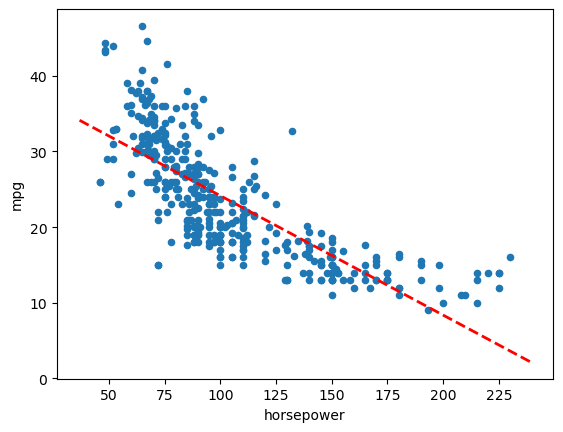

In [30]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, results.params[0], results.params[1], '--r', linewidth = 2)

/var/folders/_5/y4j884ds52508czqk75s5n8w0000gn/T/ipykernel_4309/4183587702.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0,results.params[0]), slope = results.params[1])


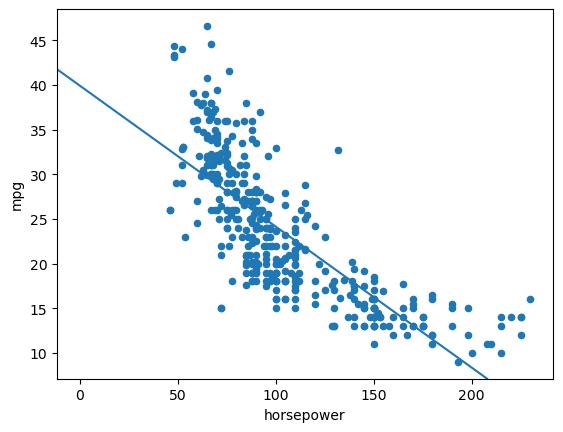

In [31]:
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.axline((0,results.params[0]), slope = results.params[1])

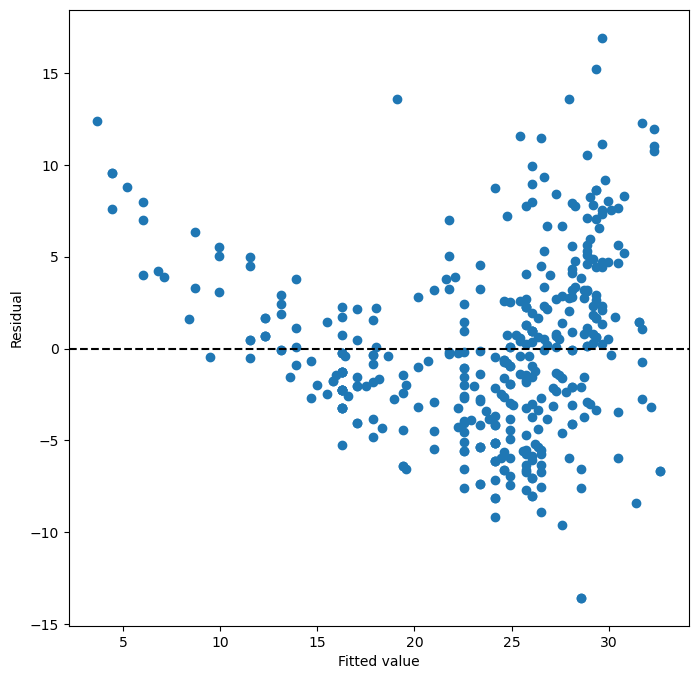

In [32]:
# residual plot
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [33]:
"""
for the lower prediction values, the model has overestimated the mpg
for the higher fitted values, the model's predictions are diverging. 
the residual plot has kind of a U share, the relationship of the predictor and result is not linear
"""

"\nfor the lower prediction values, the model has overestimated the mpg\nfor the higher fitted values, the model's predictions are diverging. \nthe residual plot has kind of a U share, the relationship of the predictor and result is not linear\n"

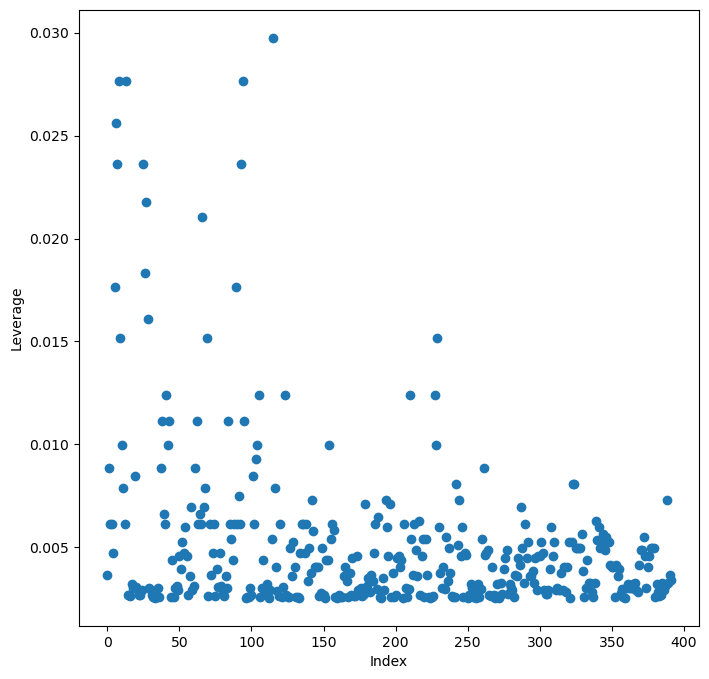

In [34]:
# Computes influence diagnostics for each observation in your fitted OLS model
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
# identifies index of largest element of an array
highest_influence_observation = np.argmax(infl.hat_matrix_diag)

In [ ]:
"""
there are some high inflation observations in the dataset
"""